The Goal of this notebook is to predict the smoker status of an individual through
the different parameters that are given. 
This is a classical binary classficiation task.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./playground-series/train.csv")
test_data = pd.read_csv('./playground-series/test.csv')

In [3]:
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [4]:
df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [5]:
df.nunique()

id                     159256
age                        18
height(cm)                 14
weight(kg)                 28
waist(cm)                 531
eyesight(left)             20
eyesight(right)            17
hearing(left)               2
hearing(right)              2
systolic                  112
relaxation                 75
fasting blood sugar       229
Cholesterol               227
triglyceride              392
HDL                       108
LDL                       222
hemoglobin                134
Urine protein               6
serum creatinine           28
AST                       140
ALT                       188
Gtp                       362
dental caries               2
smoking                     2
dtype: int64

In [6]:
df = pd.get_dummies(df, columns=['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries'], dtype=int)

In [7]:
df

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,hearing(right)_1,hearing(right)_2,Urine protein_1,Urine protein_2,Urine protein_3,Urine protein_4,Urine protein_5,Urine protein_6,dental caries_0,dental caries_1
0,0,55,165,60,81.0,0.5,0.6,135,87,94,...,1,0,1,0,0,0,0,0,1,0
1,1,70,165,65,89.0,0.6,0.7,146,83,147,...,0,1,1,0,0,0,0,0,0,1
2,2,20,170,75,81.0,0.4,0.5,118,75,79,...,1,0,1,0,0,0,0,0,1,0
3,3,35,180,95,105.0,1.5,1.2,131,88,91,...,1,0,1,0,0,0,0,0,0,1
4,4,30,165,60,80.5,1.5,1.0,121,76,91,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251,40,155,45,69.0,1.5,2.0,127,80,64,...,1,0,1,0,0,0,0,0,1,0
159252,159252,50,155,75,82.0,1.0,1.0,120,80,89,...,1,0,1,0,0,0,0,0,1,0
159253,159253,40,160,50,66.0,1.5,1.0,114,70,84,...,1,0,1,0,0,0,0,0,1,0
159254,159254,50,165,75,92.0,1.2,1.0,121,90,122,...,1,0,1,0,0,0,0,0,1,0


In [8]:
train_y = df.smoking
train_x = df.drop(columns=["smoking", "id"])
train_x, dev_x, train_y, dev_y = train_test_split(train_x, train_y, test_size=0.05, random_state=42)



In [9]:
rf = RandomForestClassifier(2048, min_samples_leaf=5)
rf.fit(train_x, train_y)

RandomForestClassifier(min_samples_leaf=5, n_estimators=2048)

<Axes: ylabel='cols'>

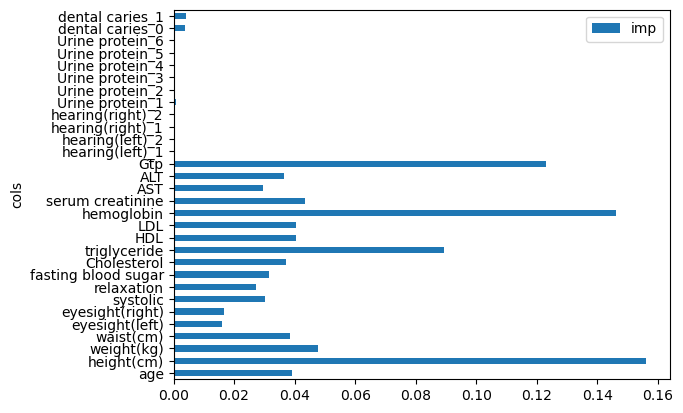

In [10]:
pd.DataFrame(dict(cols=train_x.columns, imp=rf.feature_importances_)).plot("cols", "imp", "barh")

AUC: 0.8553462990840199


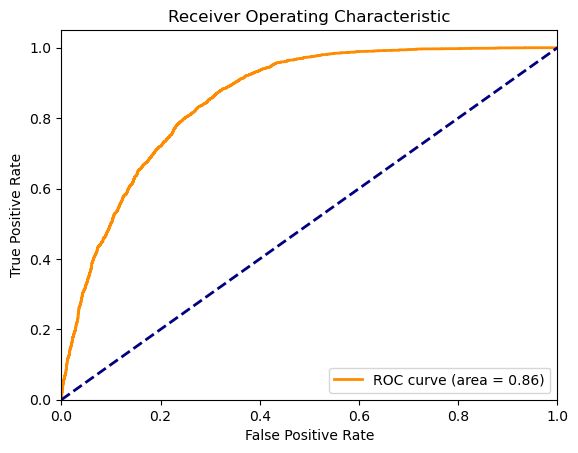

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(model, x_test, y_test):
    # Predict probabilities
    test_probabilities = model.predict_proba(x_test)[:, 1]

    # Compute ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, test_probabilities)

    # Calculate AUC
    auc = roc_auc_score(y_test, test_probabilities)
    print(f"AUC: {auc}")

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Use the function
plot_roc_curve(rf, dev_x, dev_y)


In [12]:
predictions = rf.predict_proba(test_data.drop(columns='id'))[:, 1]

submission = pd.DataFrame({
    'id': test_data['id'],
    'smoking': predictions
})
submission.to_csv('random_forests.csv', index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Urine protein
- dental caries
- hearing(left)
- hearing(right)
Feature names seen at fit time, yet now missing:
- Urine protein_1
- Urine protein_2
- Urine protein_3
- Urine protein_4
- Urine protein_5
- ...
